In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

In [2]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\hp\scikit_learn_data


In [4]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
dataset.data

array([[0.7231405 , 0.7231405 , 0.72727275, ..., 0.22727273, 0.21900827,
        0.21900827],
       [0.3677686 , 0.35950413, 0.38016528, ..., 0.2644628 , 0.2768595 ,
        0.28099173],
       [0.61157024, 0.6446281 , 0.6570248 , ..., 0.17768595, 0.2107438 ,
        0.2231405 ],
       ...,
       [0.41322315, 0.4752066 , 0.4338843 , ..., 0.24793388, 0.41322315,
        0.48347107],
       [0.6446281 , 0.69008267, 0.70247936, ..., 0.11157025, 0.10743801,
        0.11983471],
       [0.09917355, 0.11983471, 0.1570248 , ..., 0.7066116 , 0.73966944,
        0.77272725]], dtype=float32)

In [6]:
dataset.target

array([ 3, 38, 27, 18, 19, 20, 13, 11, 18, 16, 22, 34, 17, 14, 37, 18, 30,
       15, 36,  1, 29, 32, 38, 29, 34, 10, 13, 36, 20, 21, 10, 11,  0,  7,
       24, 16, 24, 27, 39, 15, 17,  4,  9,  8, 32,  8, 15, 19, 29,  5, 35,
       21, 17, 27, 33, 26, 33,  5,  0, 37, 38, 35,  5,  9, 24, 23, 25, 37,
       11, 29, 16,  6,  4,  1,  1, 13,  1, 14, 30, 16,  1, 13,  5, 23, 28,
       32,  8, 33, 28, 35, 26, 16,  6, 17, 35, 24, 16, 24, 36,  6,  3,  9,
       10,  0, 22,  1, 34, 12, 18, 23,  1, 27,  3, 15,  2, 22, 17, 26, 14,
       23, 23, 26, 18, 10,  4,  3, 29,  3, 26, 21,  7, 19, 25,  9, 32, 37,
        7, 12, 23, 26,  6, 28, 20, 25, 13, 25, 21, 28, 15, 29, 33,  2, 28,
       36, 27,  3, 21,  7, 21, 31, 20, 31, 20, 31,  2, 11, 17, 30, 20, 16,
       34, 13, 29,  8, 26, 18, 27, 25, 21, 29, 33, 36,  7,  5, 32,  8, 24,
       15, 17, 36, 17, 34, 11, 35,  3, 37,  3,  3,  0, 26, 10, 31, 37, 10,
       15, 38, 12, 32, 31, 25, 39, 22, 39,  2, 31, 34, 34, 22,  4, 27, 30,
       31, 39, 10, 38, 22

In [7]:
train_faces = dataset.data[:350,:]
test_faces = dataset.data[350:,:]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

In [10]:

from sklearn.decomposition import PCA as RandomizedPCA
n_components = 25
Rpca = RandomizedPCA(n_components=n_components, whiten= True, random_state = 101).fit(train_faces)


In [20]:
print("Explained variance by %i components: 0%.3f" % (n_components, np.sum(Rpca.explained_variance_ratio_)))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces = Rpca.transform(test_faces)

Explained variance by 25 components: 00.794


The RandomizedPCA class is an approximate PCA version, which work better when the dataset is large. The decomposition creates 25
new variables(n_components parameter) and whitening, removing some constant noise(created by textual and photo granularity) and
irrelevant information from the images in a different way from the filter.

We are looking for face id=34


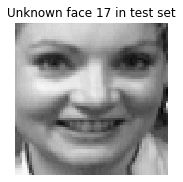

In [19]:
import matplotlib.pyplot as plt
photo = 17 # this is the photo in the test set
print("We are looking for face id=%i" % test_answers[photo])
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Unknown face '+ str(photo)+ ' in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [21]:
mask = compressed_test_faces[photo]
squard_error = np.sum((compressed_train_faces - mask)**2, axis=1)
minimum_error_face = np.argmin(squard_error)
most_resembling = list(np.where(squard_error < 20)[0])
print('Best resembling face in train test: %i' % train_answers[minimum_error_face])

Best resembling face in train test: 34


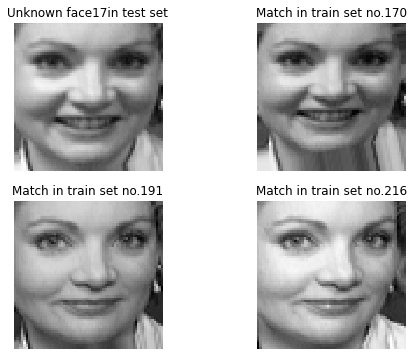

In [22]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.axis('off')
plt.title('Unknown face'+str(photo)+'in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
for k, m in enumerate(most_resembling[:3]):
    plt.subplot(2,2,2+k)
    plt.title('Match in train set no.'+str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
plt.show()